# The Spark Foundation Dec 2020 Batch

**Data Science and Business Analytics internship**

**Author : Samjhana Basnet **

**Exploratory Data Analysis -Retail**

# Task - Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn import metrics

In [66]:
data=pd.read_csv(r"P:\samjhana\SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [67]:
#Data set size(1470 rows and 35 columns)
print('Shape -',data.shape)

Shape - (9994, 13)


In [68]:
# check for nulls
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [18]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [19]:
# Checking the duplicate values
data.duplicated().sum()

17

In [20]:
# Removing the duplicate values
data.drop_duplicates(subset=None,keep='first',inplace=True)
data.duplicated().sum()

0

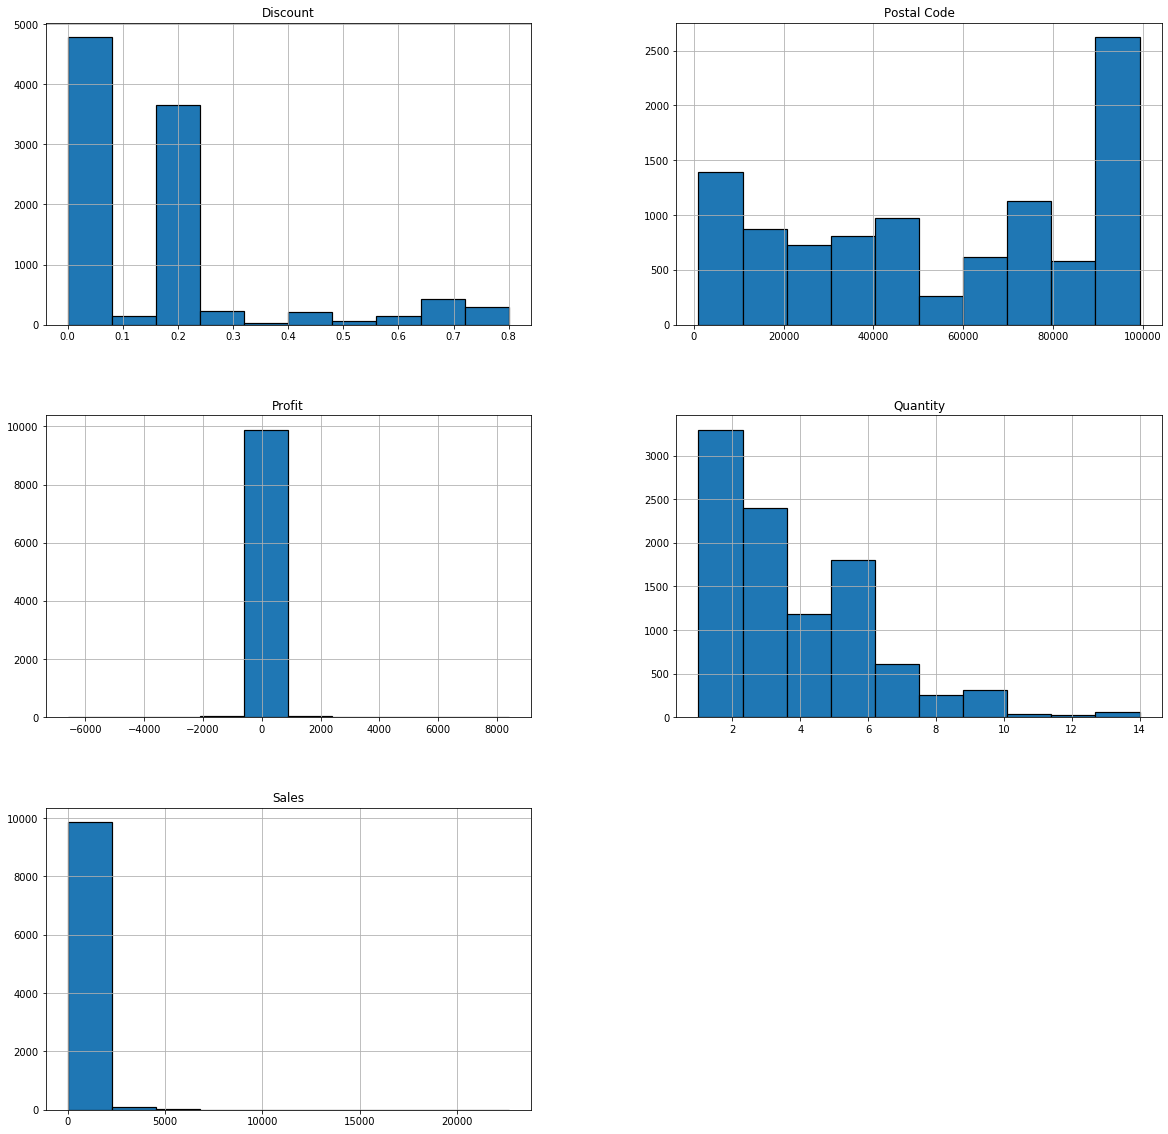

In [21]:
# Visulazing the distibution of the data for every feature
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [22]:
categorical_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print("====================================")

Ship Mode : ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segment : ['Consumer' 'Corporate' 'Home Office']
Country : ['United States']
State : ['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']
Region : ['South' 'West' 'Central' 'East']
Category : ['Furniture' 'Office Supplies' 'Technology']
Sub-Category : ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fast

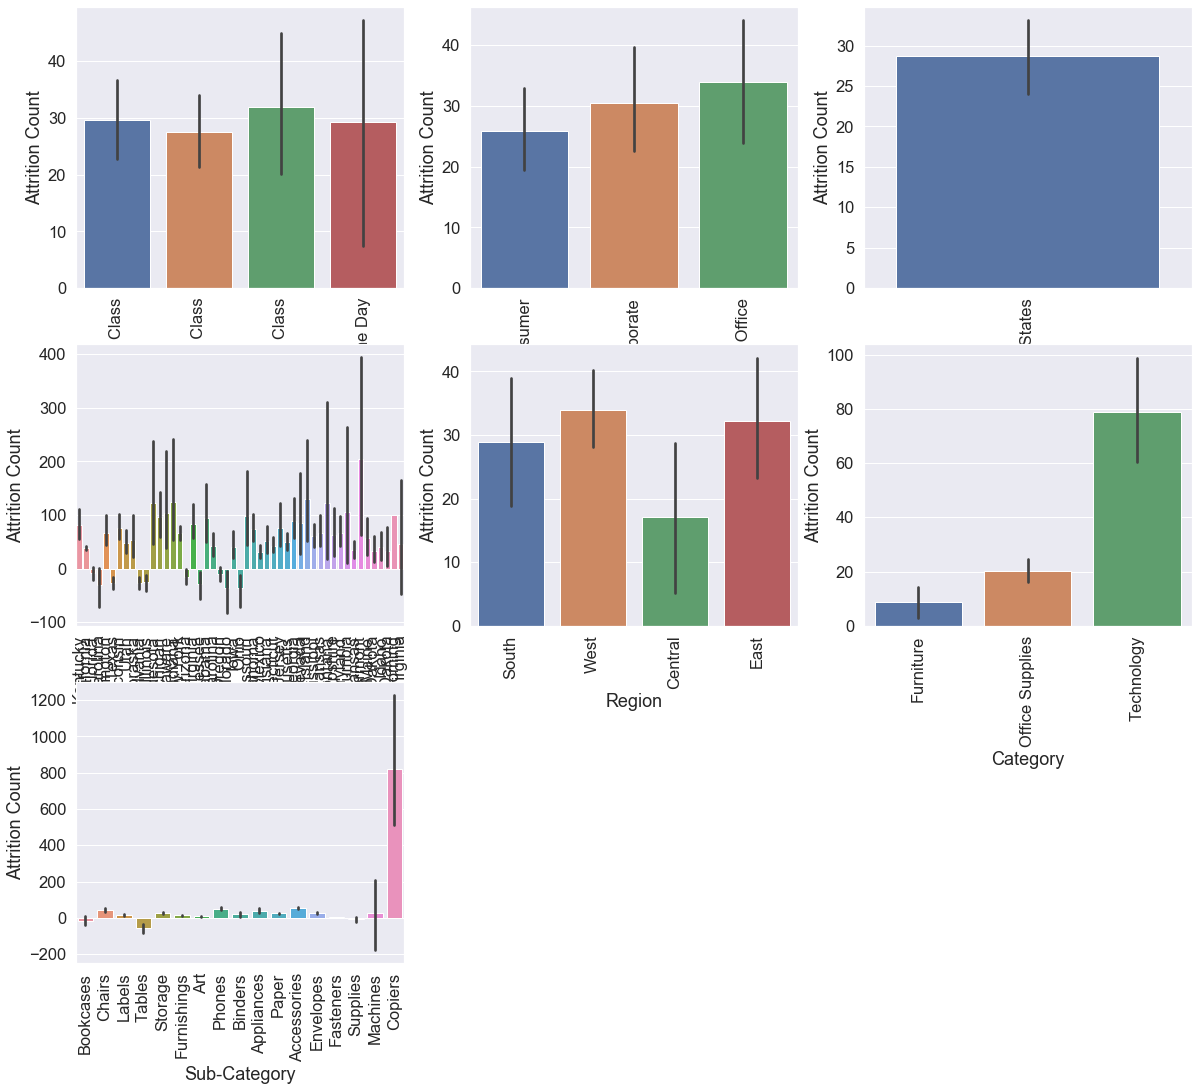

In [23]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.5)
plt.figure(figsize=(20, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(5, 3, i)
    g = sns.barplot(x=f"{column}", y='Profit', data=data)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


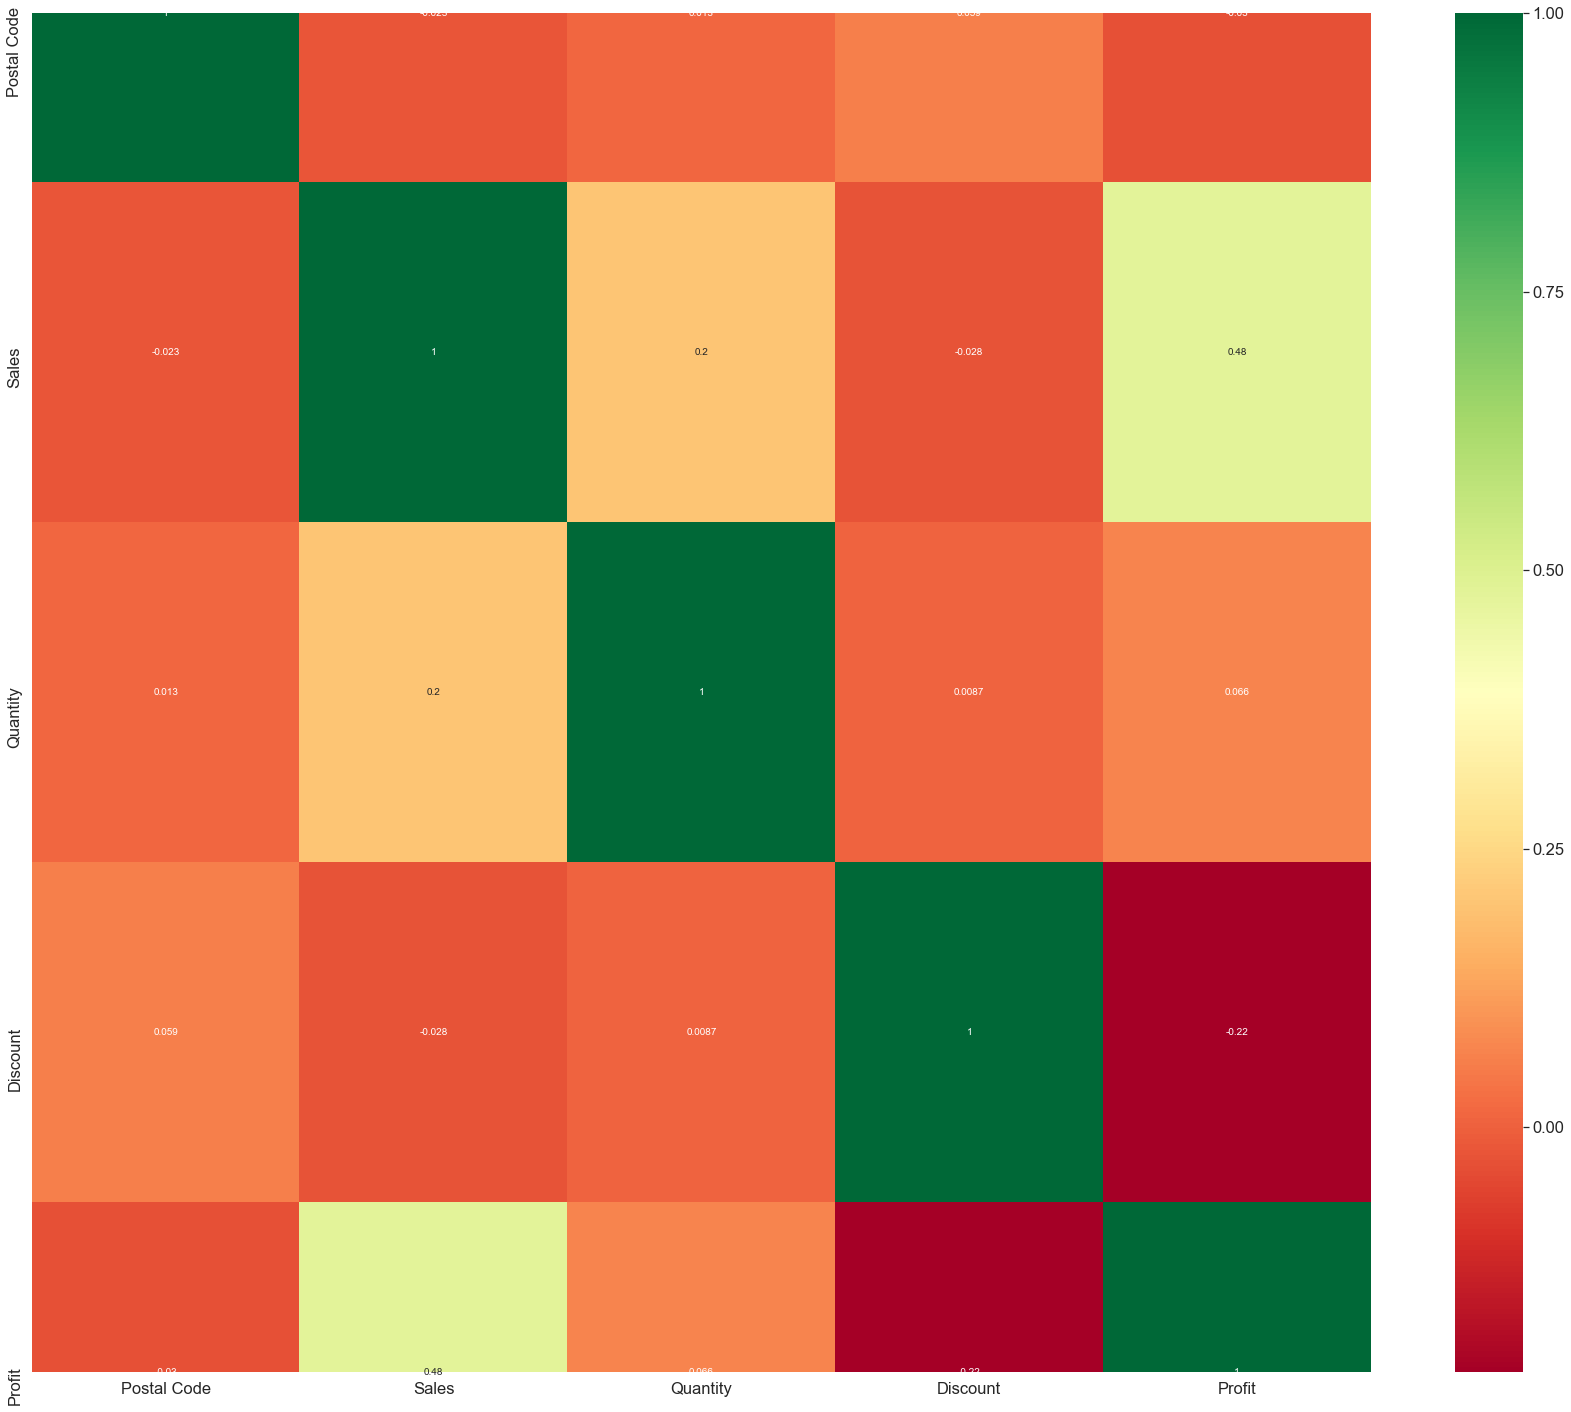

In [35]:
# calculate the correlation matrix
corr = data.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

In [36]:
#dropping postal code columns
data = data.drop(['Postal Code'],axis = 1)

In [37]:
#valuecounts for Ship Mode
data['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

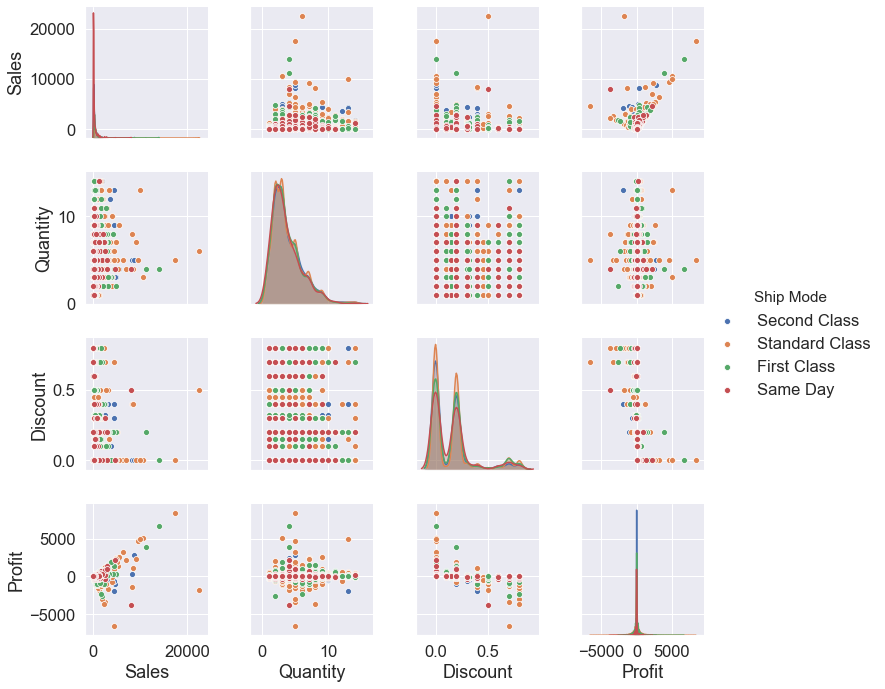

In [39]:
#plotting pair plot for Ship Mode
sns.pairplot(data, hue = 'Ship Mode')

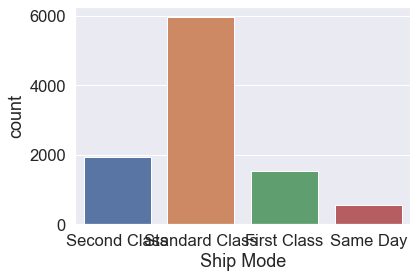

In [51]:
sns.countplot(x=data['Ship Mode'])

In [41]:
#valuecounts for segment
data['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

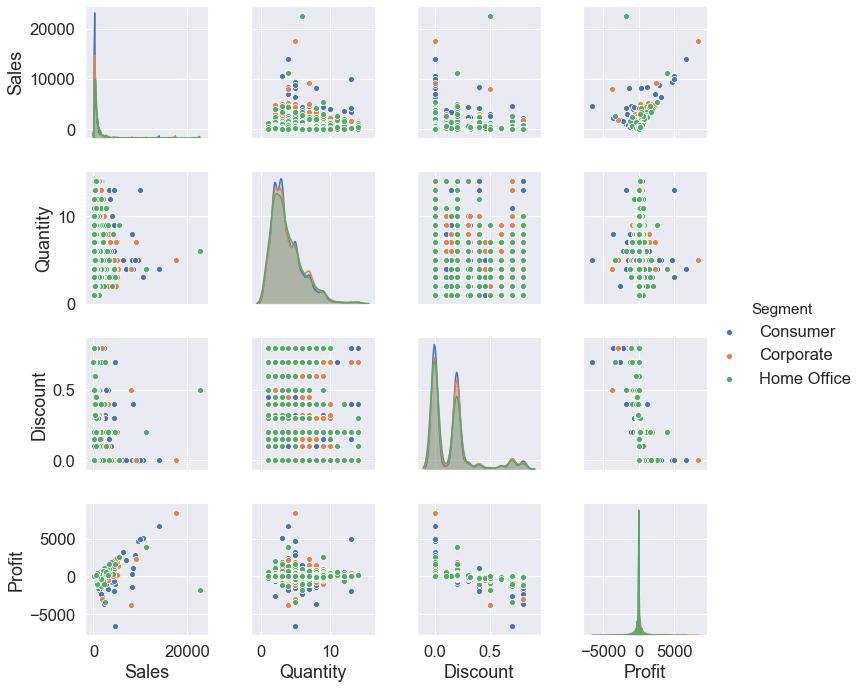

In [42]:
#plotting pair plot for Segment
sns.pairplot(data,hue = 'Segment')

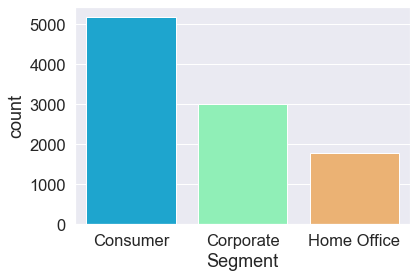

In [46]:
sns.countplot(x = 'Segment',data = data, palette = 'rainbow')

In [52]:
#valuecounts for segment
data['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

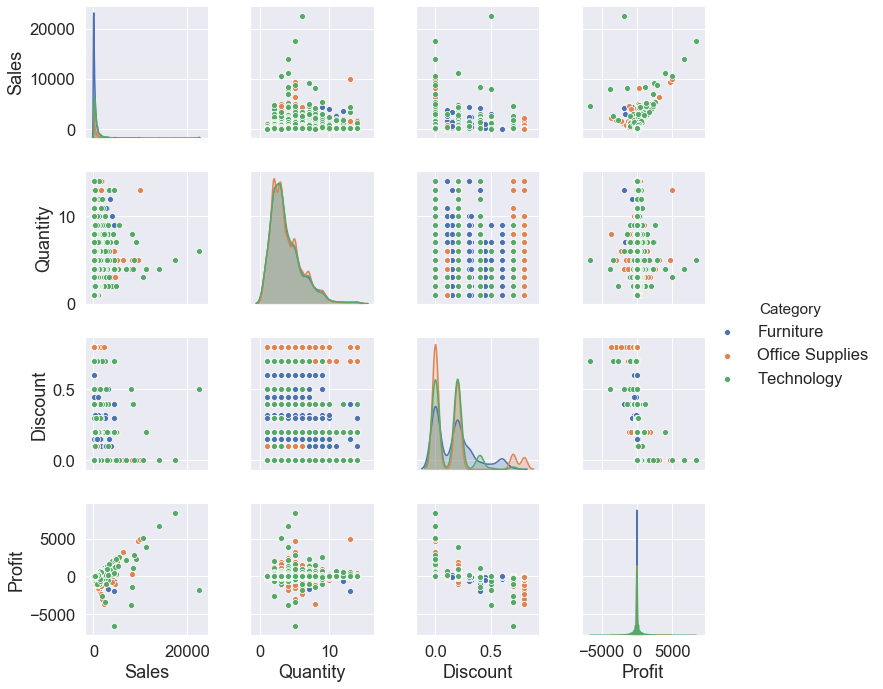

In [53]:
#plotting pair plot for Category
sns.pairplot(data,hue='Category')

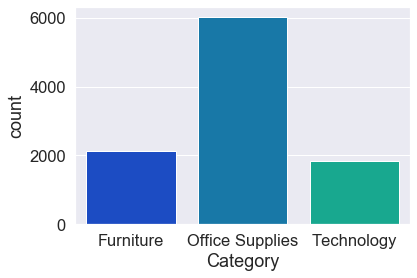

In [54]:
sns.countplot(x='Category',data=data,palette='winter')

In [55]:
#valuecounts for Sub-Category
data['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

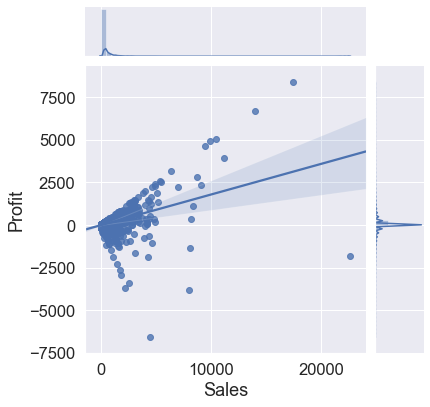

In [57]:
sns.jointplot(x='Sales',y='Profit',data=data,kind='reg')

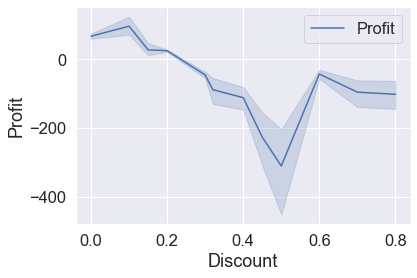

In [58]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=data)
plt.legend()
plt.show()

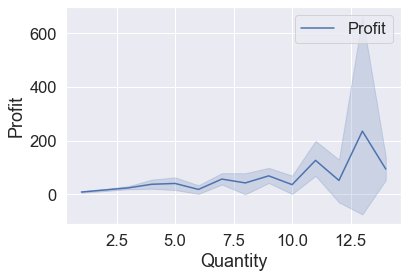

In [59]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=data)
plt.legend()
plt.show()

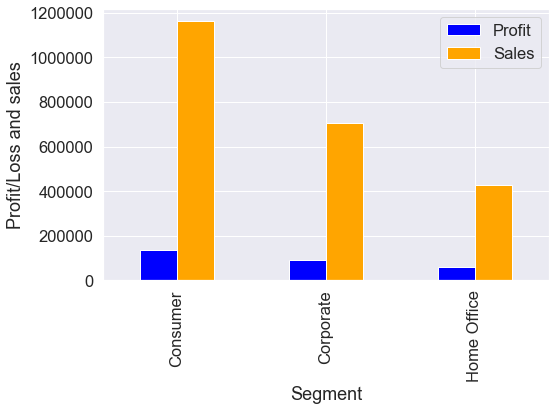

In [64]:
data.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['blue','orange'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()